In [1]:
import numpy as np
import matplotlib.pyplot as plt
import meshio
from scipy.interpolate import LinearNDInterpolator

In [9]:
def read_time_step(output_fp,stepn):
    '''
    Returns x, y, T data for a time step.

    output_fp: file path of output file for basin
    stepn: time step number to read out
    '''

    mesh = meshio.read(rf'{output_fp:s}/solution-{stepn:03d}.vtk')
    x=mesh.points[:,0]
    y=mesh.points[:,1]

    try:
        T = mesh.point_data['solution'].flatten()
    except:
        T = mesh.point_data['U'].flatten()

    return x, y, T

def time_n(stepn):
    '''
    Returns the absolute time corresponding to a time step in years.

    stepn: time step number to read out
    '''

    return np.cumsum(100*1.05**np.arange(stepn))[-1]

def interp_T(x,y,T,dx=1000):
    '''
    Interpolates mesh to a regular grid and returns 

    x,y,T: outputs of read_time_step
    dx: grid spacing (m)
    '''

    interp = LinearNDInterpolator(np.stack([x,y],axis=1),T)
    
    X = np.arange(0,np.max(x),dx)
    Y = np.arange(np.min(y),0,dx)
    
    xi,yi = np.meshgrid(X, Y) 
    Ti = interp(X, Y)
    
    return xi,yi,Ti

## Example: Plotting temperature profile of 1800 km basin at time step 100

In [7]:
test_step = 100
xt,yt,Tt=read_time_step('/home/basinuser/BasinUser/BasinCooling/BasinData/InPaper/1800km/output/',test_step)

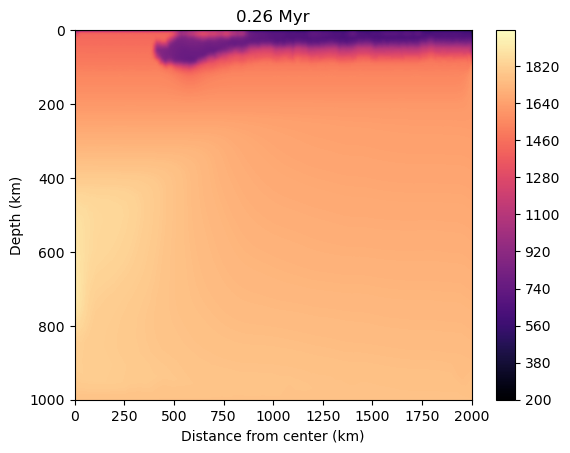

In [15]:
plt.figure()
plt.tricontourf(xt/1000,-yt/1000,Tt,cmap=plt.cm.magma,levels=np.arange(200,2000,5))
plt.colorbar()
plt.title(f'{time_n(test_step)/1e6:1.2f} Myr')
plt.xlabel('Distance from center (km)')
plt.ylabel('Depth (km)')
plt.gca().invert_yaxis()